<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2024/blob/main/notes/31-npc-reductions1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 31: Proving NP-completeness using reductions

<div class="alert alert-info">
    <p><b>Read</b> page 311.</p>
</div>

We've proven that SAT and 3SAT are NP-complete. Now we turn to other languages, for example, CLIQUE. If we wanted to prove that CLIQUE is NP-hard "from scratch", we'd have to give a polynomial-time reduction from *any* NP language $A$ to CLIQUE:

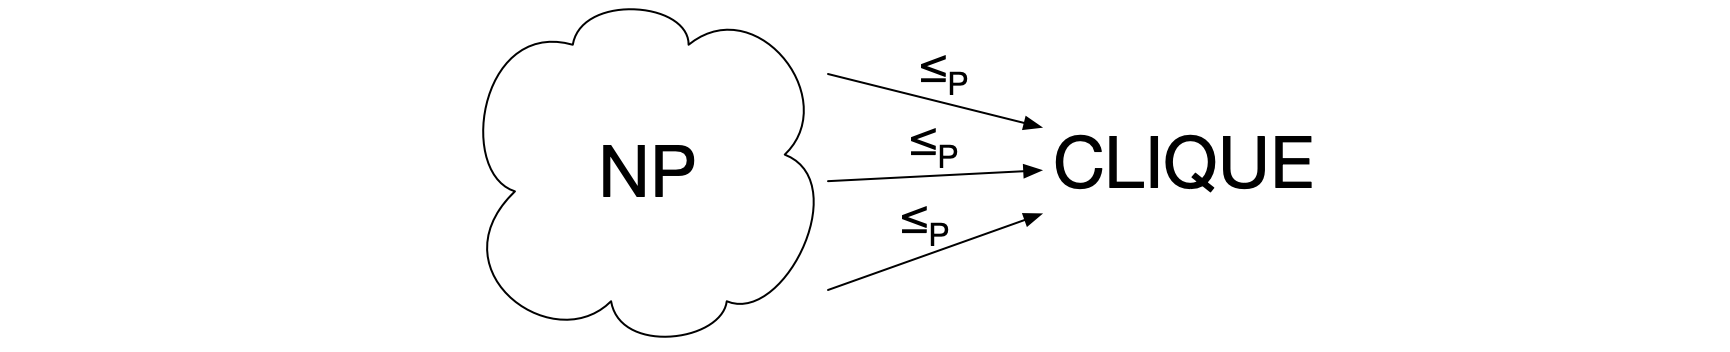

But now that we've proven that 3SAT is NP-complete, our task becomes slightly easier. We no longer have to show a reduction from *every* NP language $A$ to 3SAT; we know that every NP language reduces to 3SAT, so it's enough to show a reduction from 3SAT to CLIQUE, and we automatically get a reduction from every NP language $A$ to CLIQUE:

![image.png](attachment:image.png)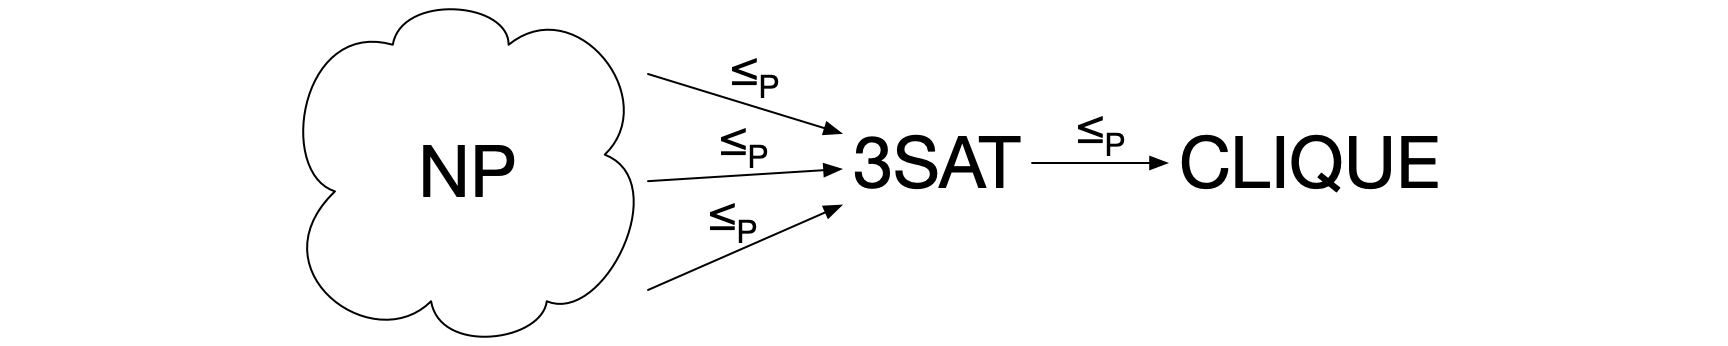

This is possible because polynomial-time reducibility is transitive. Here's a pictorial proof of this fact:

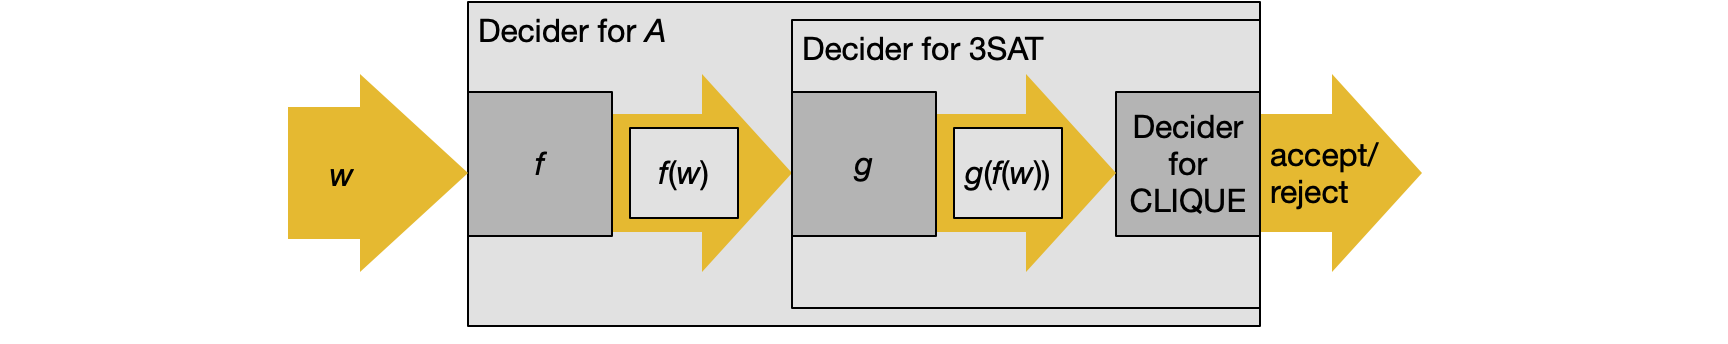

Once we've proven 3SAT NP-complete, we can prove that (say) CLIQUE is NP-complete by giving a reduction from 3SAT to CLIQUE, and so on.

Here's a picture of the reductions proven in the book:

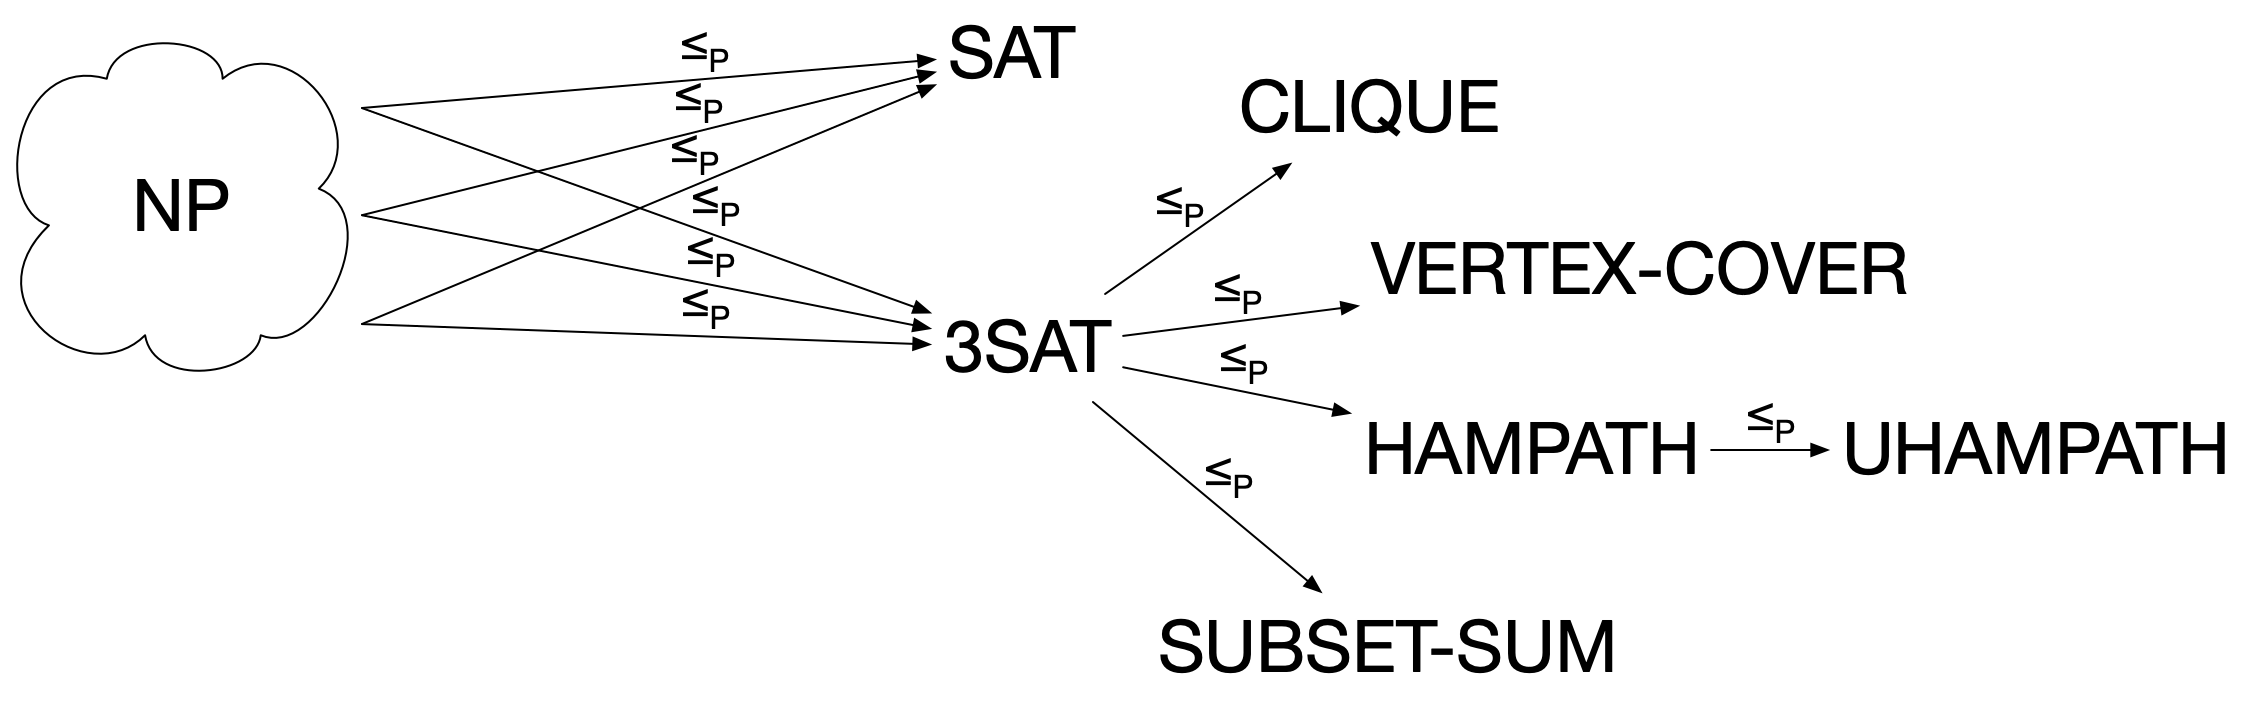

For CLIQUE, the outline of the proof will look like this:

- To prove that CLIQUE is in NP, you either:
    - Give a polynomial-time deterministic verifier for it, or
    - Give a polynomial-time NTM for it.
- To prove that CLIQUE is NP-hard, assume that it can be decided in polynomial time by $R$, and construct a polynomial-time decider for 3SAT: $S={}$"On input $\phi$, 1. Convert $\phi$ to a graph $G$ and number $k$. 2. Run $R$ on $\langle G, k\rangle$. 3. If $R$ accepts, *accept*; else, *reject*."
What needs to be filled in:
    - How to convert $\phi$ to $G$ and $k$.
    - Prove that $\phi$ is satisfiable iff $G$ has a clique of size $k$.
    - Prove that the conversion runs in polynomial time.

More generally, to prove that a language $B$ is NP-complete by reduction from another NP-complete language $A$, you must do the following:

- To prove that $B$ is in NP, you either:
    - Give a polynomial-time deterministic verifier for it, or
    - Give a polynomial-time NTM for it.
- To prove that $B$ is NP-hard, assume that $B$ can be decided in polynomial time by $R$, and construct a polynomial-time decider for $A$: $S={}$"On input $w$, 1. Compute $f(w)$. 2. Run $R$ on $f(w)$. 3. If $R$ accepts, *accept*; else, *reject*."
You fill in:
    - Define a mapping $f$ from instances of $A$ to instances of $B$.
    - Prove that $w \in A$ iff $f(w) \in B$.
    - Prove that $f$ runs in polynomial time.

### Some tips on inventing reductions

I personally find all four of the example reductions in the book difficult. It's not too hard to understand them, but difficult to imagine yourself coming up with them. Below, I try to complement the book's presentations of the reductions with a sketch of the thought process one might go through to arrive at each reduction.

One general fact about 3SAT is that because a satisfying truth-assignment just needs to make at least one literal in each clause true, another way of thinking about the problem is that we need to find a way to choose one literal from each clause -- let's call it the "lucky" literal (I have no idea if there's a standard term for it) -- such that no lucky literals are contradictory (that is, $x$ and $\neg x$ can't both be lucky). In our example formula, there are several ways of choosing the lucky literals:

\begin{gather*}
(x_1 \lor x_1 \lor \underline{x_2}) \land (\underline{\neg x_1} \lor \neg x_2 \lor \neg x_2) \land (\underline{\neg x_1} \lor x_2 \lor x_2) \\
(x_1 \lor x_1 \lor \underline{x_2}) \land (\underline{\neg x_1} \lor \neg x_2 \lor \neg x_2) \land (\neg x_1 \lor \underline{x_2} \lor x_2) \\
(x_1 \lor x_1 \lor \underline{x_2}) \land (\underline{\neg x_1} \lor \neg x_2 \lor \neg x_2) \land (\neg x_1 \lor x_2 \lor \underline{x_2})
\end{gather*}

Most of the reductions in Section 7.5 use this alternative view.

When you start to look for a reduction, here are some questions to think about. They won't necessarily all have answers, but they may help you to come up with ideas.

- The formula $\phi$ becomes the input to the problem.
    - How do you represent the variables? Sometimes there is one "gadget" for each of the $l$ variables.
    - How do you represent the clauses? Usually there is one "gadget" for each clause, encoding which literals appear in each clause.
- Truth-assignments and/or the choice of lucky literals become certificates.
    - How do you represent that a variable is true/false? How do you ensure that a variable isn't true and false at the same time, or neither true nor false?
    - How do you represent that a literal is lucky/unlucky? How do you ensure that each clause has exactly one lucky literal?
    - If you have both of the above, how do you ensure they are consistent with each other?
    - How do you ensure that all clauses are true, or that no lucky literals are contradictory?

### The clique problem

<div class="alert alert-info">
    <p><b>Re-read</b> the pages on the clique problem, which is scattered across several sections: definition (295-296), membership in NP (296-297), reduction from 3SAT (302-303), and finally NP-completeness (bottom of 311).</p>
</div>

In a graph, a *clique* is a subset of nodes in which each pair of nodes is connected by an edge. For example, in this graph:

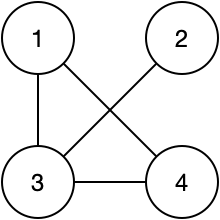

the set {1,3,4} is a clique, but {1,2,3} is not. The clique problem is to decide whether a graph has a clique of size $k$. More formally, CLIQUE is the set of pairs $\langle G, k\rangle$ where $G$ is a graph and there is a subset of $k$ nodes that are pairwise connected by an edge.

Proof that CLIQUE is in NP: If $G$ is stored as an adjacency matrix, we can check whether a subset of nodes has size $k$ and is fully connected in $O(k^2)$ time.

Proof that CLIQUE is NP-hard: By reduction from 3SAT. We need to show how to convert a 3CNF formula $\phi$ into a graph and a number $k$.

To try to give some idea of the thought process needed to find a reduction (which is different from the way you'd actually write it), I present an

> Interior monologue:
>
> The input to CLIQUE is a graph, which has nodes and edges, and $k$. So maybe the variables will become nodes and the clauses edges? Or the variables will become edges and the clauses will become nodes? It's hard to say, so (not just here but in general) I think we will get more traction by thinking about certificates.
>
> The certificates are subsets of $k$ nodes; in other words, a certificate says whether each node is in the subset or not, and there are exactly $k$ in it.
>
> - So maybe nodes could be variables, and a node belongs to the clique iff the variable is true? But it's not clear why we would want exactly $k$ variables to be true.
>
> - Another idea is to create a node for each variable and its negation. A node $x$ belongs to the clique if $x$ is true, and node $\neg x$ belongs to the clique if $x$ is false. Now we want exactly $l$ nodes to be in the clique. This idea works, but is not enough; we still need a way to represent clauses, and it will turn out that this idea will become unnecessary.
>
> - Maybe nodes could be literals, and a node belongs to the clique iff the literal is true? As in the first idea, it's not clear why we would want exactly $k$ literals to be true.
>
> - How about if a node belongs to the clique iff the literal is lucky? This is promising, because we want exactly $m$ literals to be lucky.

For each literal in $\phi$, create a node in the graph $G$, and set $k = m$.

> Here's what our example formula looks like so far. The blue nodes correspond to one possible set of lucky literals.
>
> 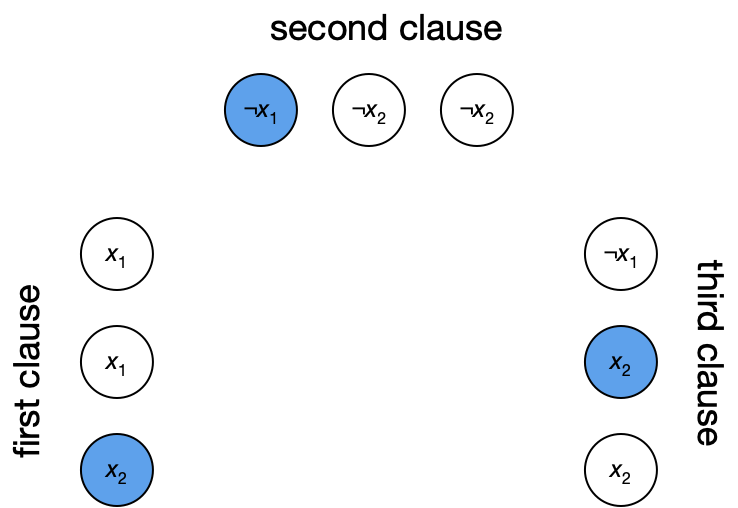
>
> This graph doesn't have any $k$-cliques, however, because it doesn't have any edges. Imagine adding all possible edges to this graph; now we have too many $k$-cliques.
>
> First, we must ensure that no clause has two lucky literals. We can do this by removing edges between nodes belonging to the same clause.
>
> Second, we must ensure that no two lucky literals are contradictory. We can do this by removing edges between nodes that are contradictory.

Add an edge between all pairs of nodes $u$ and $v$, except if $u$ and $v$ correpond to literals in the same clause or $u$ and $v$ correspond to contradictory literals.

For our example formula, here is the resulting graph:

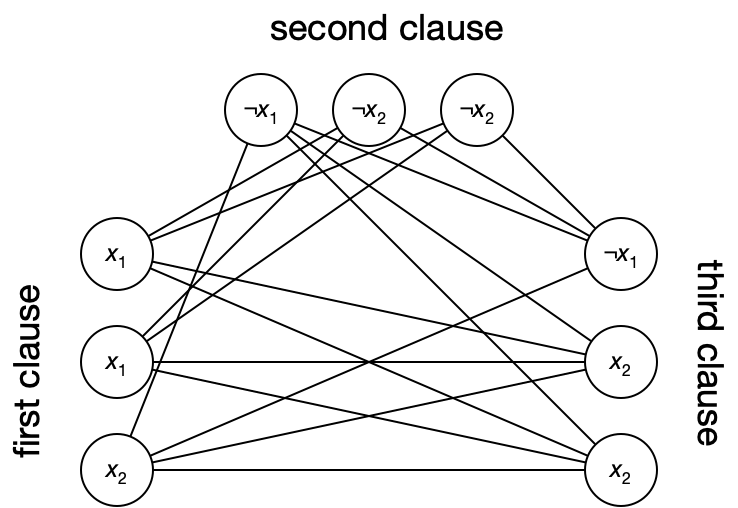

It may be easier to visualize the edges that are *not* added:

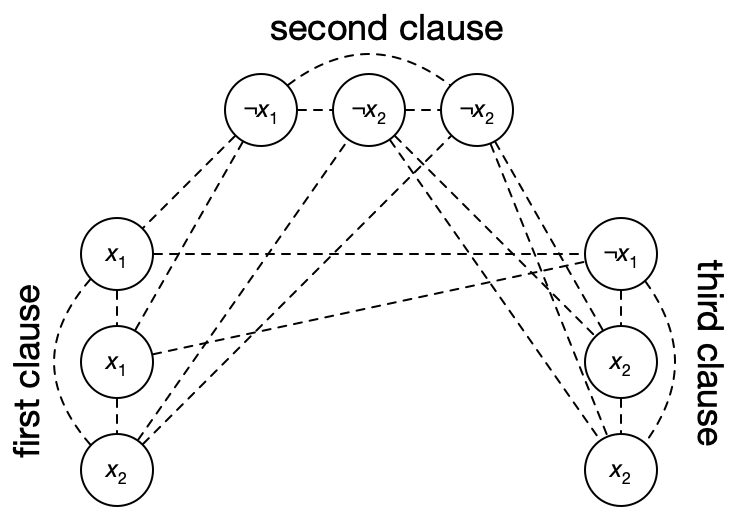

Here are the three cliques of this graph, corresponding to the three possible sets of lucky literals:

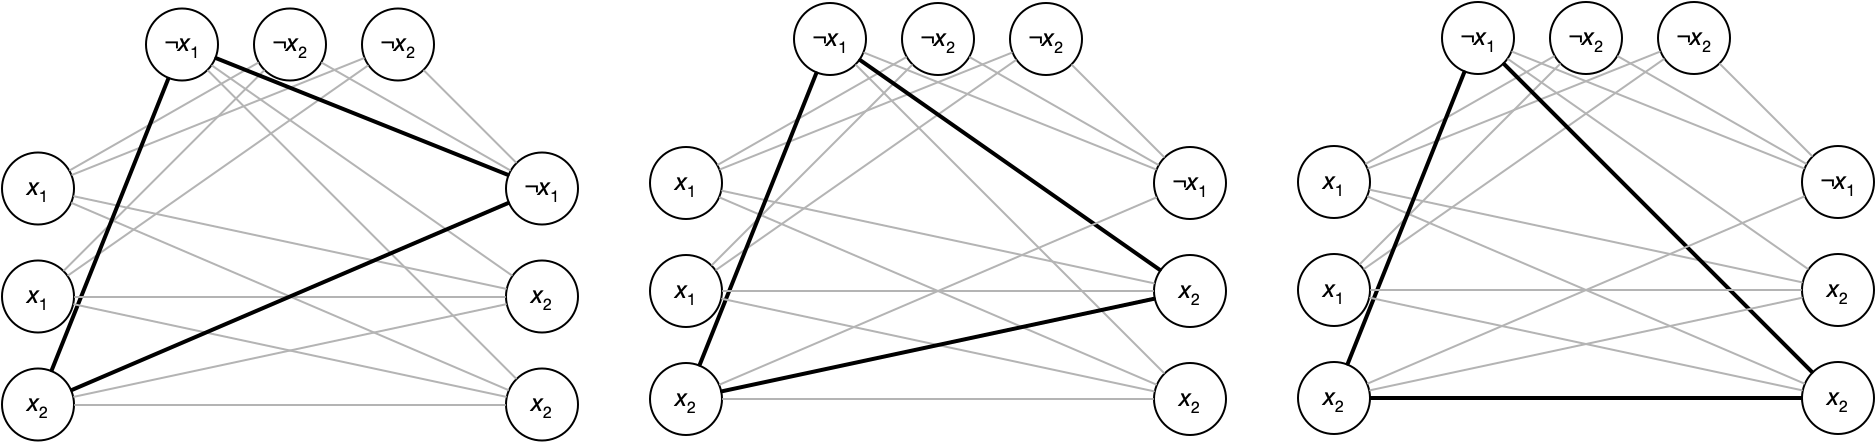

Next, we need to show that $\phi$ is satisfiable iff $G$ has a $k$-clique. Although we already thought this through, the order was backwards (as is often the case!) from the logical order. Please see the book for how this part of the proof should be written.

Finally, we need to show that constructing $G$ takes polynomial time. In this case, it's if you simply say this is obvious or (like the book) say nothing.